In [14]:
import pandas as pd
from barplots import barplots
import matplotlib.pyplot as plt

In [2]:
graph_names = [
    "Monarch",
    "KGCOVID19",
    "PheKnowLator"
]
task_name = "load_graph"
libraries = [
    "NetworkX",
    "FastEnsmallenGraph"
]

In [8]:
benchmarks = []
for graph_name in graph_names:
    for library in libraries:
        path = f"graphs/results/{graph_name}/{library}/{task_name}.csv"
        df = pd.read_csv(path, sep=",")
        df.columns = ["Time requirements", "Peak RAM requirements"]
        df["graph_name"] = graph_name
        if library == "FastEnsmallenGraph":
            library = "Ensmallen"
        df["library"] = library
        benchmarks.append(df.max())
benchmarks = pd.DataFrame(benchmarks)
benchmarks = benchmarks.set_index(["library", "graph_name"])
benchmarks

,,Time requirements,Peak RAM requirements
library,graph_name,,
NetworkX,Monarch,390.432931,23.225485
Ensmallen,Monarch,12.050032,0.255036
NetworkX,KGCOVID19,150.215349,7.505799
Ensmallen,KGCOVID19,3.120389,0.121309
NetworkX,PheKnowLator,38.089839,2.283796
Ensmallen,PheKnowLator,0.826149,0.060004


In [20]:
import humanize 

def xformat_func(value, tick_number):
    if value == 0:
        return "0s"
    if value < 1e-9:
        return r"${:.2f}ps$".format(value * 1e12)
    if value < 1e-6:
        return r"${:.2f}ns$".format(value * 1e9)
    if value < 1e-3:
        return r"${:.2f}\mu s$".format(value * 1e6)
    if value < 1:
        return r"${:.2f}ms$".format(value * 1e3)
    if value < 60:
        return r"${:.2f}s$".format(value)
    if value < 3600:
        return r"${:.2f}m$".format(value / 60)
    
    return r"${:.2f}h$".format(value / 3600)

def yformat_func(value, tick_number):
    return humanize.naturalsize(value * (1000**3)).replace(".0 ", "")

Rendering barplots:   0%|          | 0/2 [00:00<?, ?it/s]

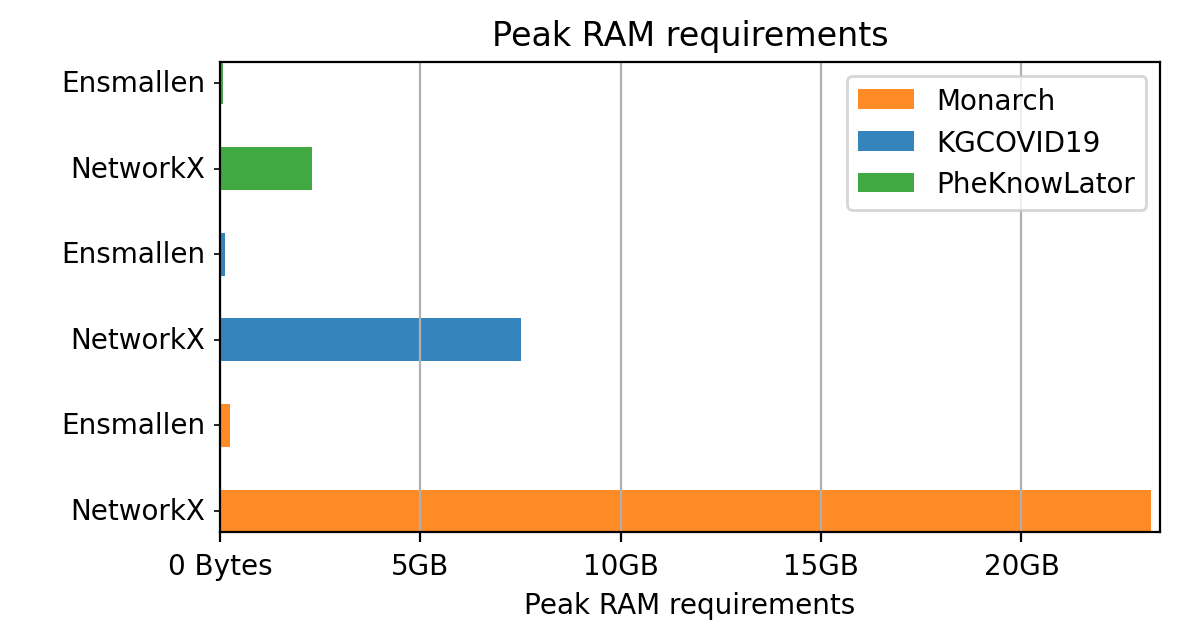

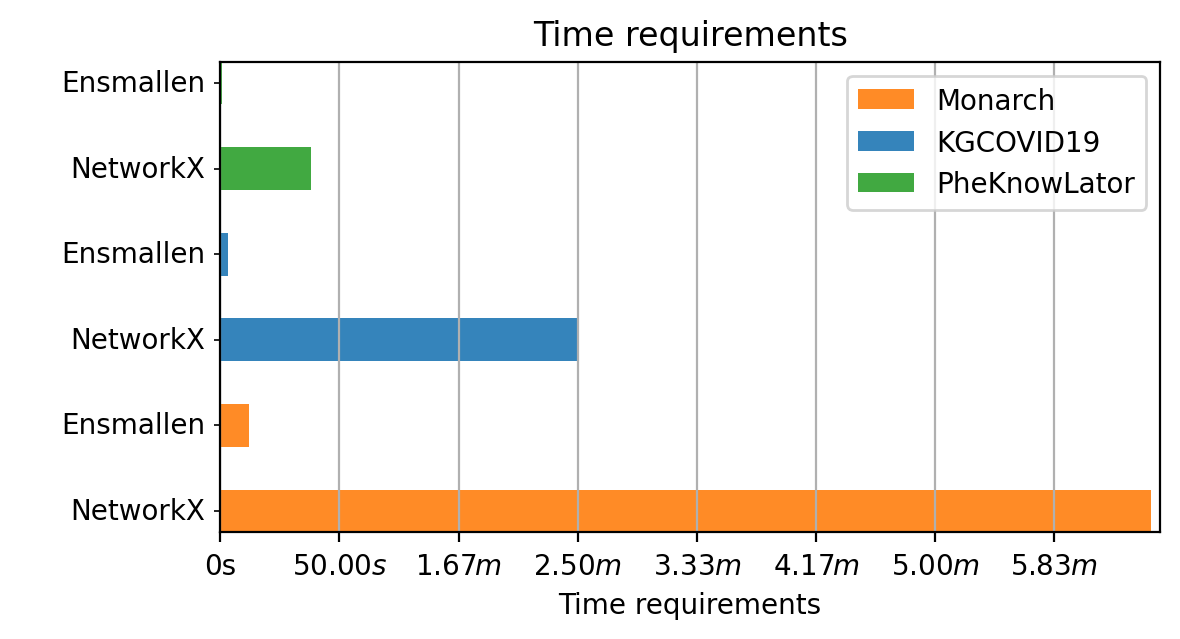

In [24]:
figs, axes = barplots(
    benchmarks,
    show_standard_deviation=False,
    orientation="horizontal",
    height=6,
)

axes[1][0].xaxis.set_major_formatter(plt.FuncFormatter(xformat_func))
axes[0][0].xaxis.set_major_formatter(plt.FuncFormatter(yformat_func))

Rendering barplots:   0%|          | 0/2 [00:00<?, ?it/s]

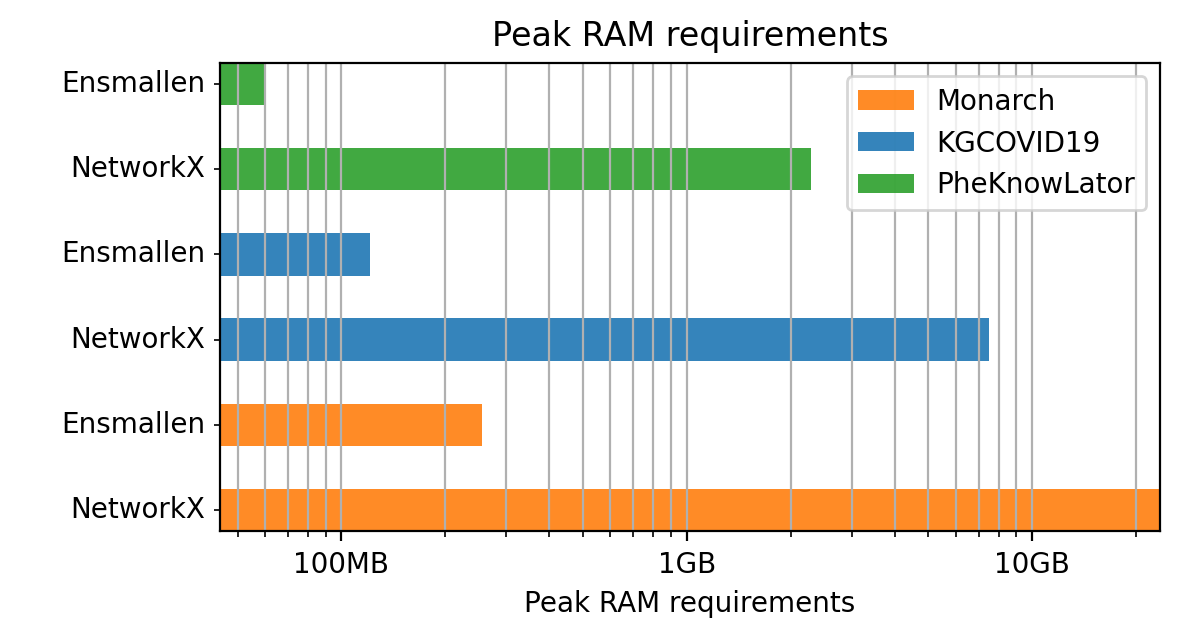

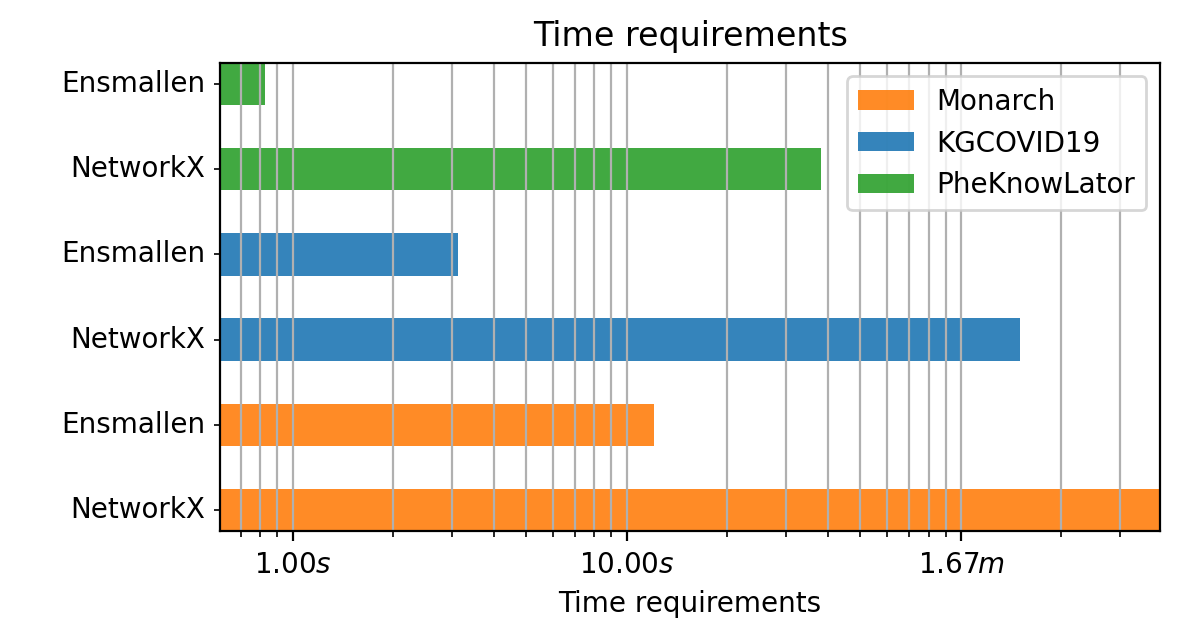

In [23]:
figs, axes = barplots(
    benchmarks,
    show_standard_deviation=False,
    orientation="horizontal",
    height=6,
    scale="log"
)

axes[1][0].xaxis.set_major_formatter(plt.FuncFormatter(xformat_func))
axes[0][0].xaxis.set_major_formatter(plt.FuncFormatter(yformat_func))